In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import matplotlib.pyplot as plt


In [2]:
# 데이터 불러오기
train = pd.read_csv('/content/train.csv')# 모델 학습 파일
test = pd.read_csv('/content/test.csv')# 모델 시험지 파일
submission = pd.read_csv('/content/submission.csv')#답안지 파일 

In [3]:
columns = ['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']
X_train = train[columns]
y_train = train['count']
X_test = test[columns]

In [4]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [5]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
# 온도컬럼에 대해서 결측치가 있는 rows를 보여준다.

train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
#연습)마찬가지로 pm2.5에 관한 결측치도 봐야겠다.
#117개의 row가 나온다.

train[train['hour_bef_pm2.5'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
100,149,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0
...,...,...,...,...,...,...,...,...,...,...,...
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0
1378,2066,11,10.1,0.0,1.5,59.0,990.0,0.015,39.0,NaN,78.0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN,42.0
1398,2096,20,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0


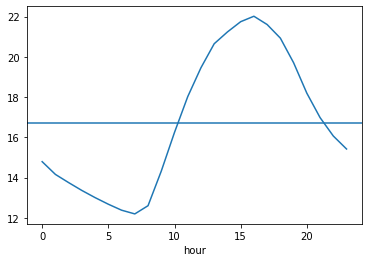

In [8]:
# 시간에 따른 온도변화를 그래프로 보려고한다.

train.groupby('hour').mean()['hour_bef_temperature'].plot()

#가로줄은 평균의 온도를 나타낸다.
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())

# 평균의 온도와 최저최고온도의 갭이 상당히 크다.

In [9]:
#각 시간별 평균온도로 결측치에 적정한 온도를 삽입해보자.

#현재 온도에 대한 결측치는 자정과 18시에 대한 결측이 전부이다.

train['hour_bef_temperature'].fillna({934:15,1035:21},inplace=True)

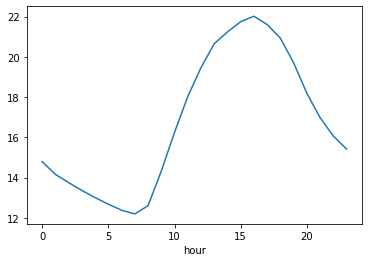

In [10]:
# 잘 적용된것같다.
train.groupby('hour').mean()['hour_bef_temperature'].plot()

In [11]:
#잘 들어간 것을 볼수있다.
train.loc[[934,1035],:]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
#하지만 이런방식으로 일일이 넣어주려니까 화난다.. 
#만약 데이터들이 선형적인 속성을 보인다면 interpolate()를 사용해서 결측을 처리할것이다.
# hour_bef_precipitation      2
# hour_bef_windspeed          9
# hour_bef_humidity           2
# hour_bef_visibility         2
# hour_bef_ozone             76
# hour_bef_pm10              90
# hour_bef_pm2.5            117

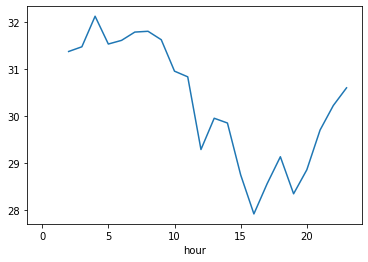

In [13]:
train.groupby('hour').mean()['hour_bef_pm2.5'].plot()

In [14]:
train = train.interpolate(method='linear')



In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


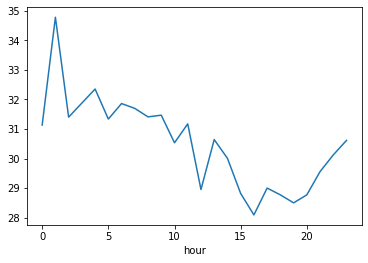

In [16]:
train.groupby('hour').mean()['hour_bef_pm2.5'].plot()

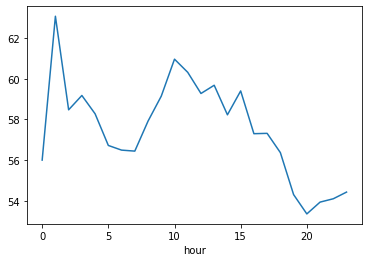

In [17]:
train.groupby('hour').mean()['hour_bef_pm10'].plot()

In [18]:
test = test.interpolate(method='linear')

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    715 non-null    float64
 3   hour_bef_precipitation  715 non-null    float64
 4   hour_bef_windspeed      715 non-null    float64
 5   hour_bef_humidity       715 non-null    float64
 6   hour_bef_visibility     715 non-null    float64
 7   hour_bef_ozone          715 non-null    float64
 8   hour_bef_pm10           715 non-null    float64
 9   hour_bef_pm2.5          715 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


# 모델링

In [20]:
features = ['hour','hour_bef_temperature','hour_bef_windspeed']
X_train = train[features]
y_train = train['count']
X_test = test[features]


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)



(1459, 3)
(1459,)
(715, 3)


In [22]:
model100 = RandomForestRegressor(n_estimators=100, random_state= 0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth= 5 ,random_state= 0)
model200 = RandomForestRegressor(n_estimators=200)


In [23]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

# 모델학습

In [25]:
submission['count'] = ypred1
submission

,id,count
0,0,87.935
1,1,245.000
2,2,107.470
3,4,32.580
4,5,131.850
...,...,...
710,2148,66.650
711,2149,53.550
712,2165,126.200
713,2166,187.730


In [26]:
submission.to_csv('model100.csv', index = False)

In [27]:
submission['count'] = ypred2
submission.to_csv('model100_5.csv', index = False)

In [28]:
submission['count'] = ypred3
submission.to_csv('model200.csv', index = False)

#추가 제출

In [29]:
model500 = RandomForestRegressor(criterion='mse',n_estimators=500)

In [30]:
model500.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
ypred4 = model500.predict(X_test)

In [32]:
submission['count'] = ypred4
submission.to_csv('model500.csv', index = False)

#선형회귀

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [34]:
model_l = LinearRegression().fit(X_train, y_train)

In [35]:
y_pred5 = model_l.predict(X_test)

In [36]:
submission['count'] = y_pred5
submission.to_csv('model_l.csv', index = False)

#randomforest에 rmse시도


In [42]:
model_Rf = RandomForestRegressor(criterion='friedman_mse',n_estimators=200)
model_Rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='friedman_mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred6 = model_Rf.predict(X_test)

In [46]:
submission['count'] = y_pred6
submission.to_csv('model_Rf.csv', index = False)

In [48]:
model_Ra = RandomForestRegressor(criterion='mae' , n_estimators=200)
model_Ra.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
submission.to_csv('model_Ra.csv', index = False)

In [50]:
model_Ra_2 = RandomForestRegressor(criterion='mae' , n_estimators=100)
model_Ra_2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
submission.to_csv('model_Ra_2.csv', index = False)